In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from head import opentrons
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

INFO: Using numpy backend


In [3]:
# read data from .xslx that we use as an example
example_xslx = '../data/DLSExample/ABC.xlsx'
spectra = pd.read_excel(example_xslx, index_col=0, engine='openpyxl')
sizes = spectra.index.to_numpy()

In [4]:
def read_dls(xlsx):
    xlsx = pd.read_excel(xlsx, index_col=0, engine='openpyxl')
    spectra = xlsx.values
    sizes = xlsx.index.to_numpy()
    sizes = np.log10(sizes) # to normal distribution
    p = spectra/100
    return sizes, p.T

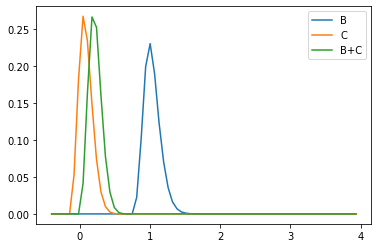

In [5]:
fig, ax = plt.subplots()
names = ['B', 'C', 'B+C']
for i in range(spectra.shape[1]):
    p = spectra.iloc[:,i].to_numpy()/100
    x = np.log10(sizes)
    ax.plot(x, p, label=names[i])
ax.legend()
plt.show()

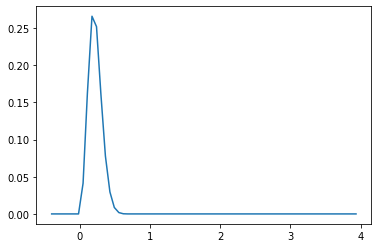

In [6]:
# we create a target spectra here
# in this case we select one from the spectra data frame loaded above
xt = np.log10(sizes)
yt = spectra.iloc[:,2].to_numpy()/100
plt.plot(xt, yt)
plt.show()

In [7]:
# set up your design space using the lower and upper limits
B = [0,1]
C = [0,1]
bounds = [B, C]

In [8]:
optim = opentrons.Optimizer(xt, yt, bounds, 
                            savedir = '../data/opentrons/', 
                            batch_size=3, hyperplane=True
                           )

INFO: Getting suggestions for iteration 0


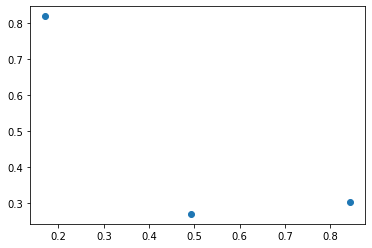

In [9]:
plt.scatter(optim.new_x[:,0], optim.new_x[:,1])

In [10]:
# save the object you would get the concentrations as 
# a .npy file that you can load into an array and process for OT2 stocks etc
optim.save()

INFO: Iteriation 0 has an existing directory in ../data/opentrons//0


In [11]:
# there's a random.xlsx file added to the location below 
# in this case it was selected to be a portion of the spectra data frame loaded above
optim.update(example_xslx, read_spectra=read_dls)

INFO: Current experiment id : 0
INFO: Iteration : 1
INFO: 0	[0.170913   0.81806052]	[-0.59681737]
INFO: 1	[0.49193472 0.2694729 ]	[-0.40045571]
INFO: 2	[0.84284961 0.30233574]	[-0.]


In [12]:
# save again so that you've a trace after each iteration
# this will save to the same iteration directory but adds model and spectra that we provided in the previous cell
optim.save()

INFO: Iteriation 0 has an existing directory in ../data/opentrons//0


In [13]:
# running the next iteratiorn with BO selection is very similar
# We additionally call the following to get the suggestion and save them into iteration id
optim.suggest_next()
optim.save()
optim.new_x

INFO: Getting suggestions for iteration 1
INFO: Iteriation 1 has an existing directory in ../data/opentrons//1


tensor([[8.7381e-01, 1.2619e-01],
        [7.4008e-01, 2.5992e-01],
        [1.0000e+00, 2.3589e-11]], dtype=torch.float64)

In [14]:
# we now have to go back to the OT2, make the samples and measure them 
# collect the UV-Vis in a xlsx file and update the optimizer
optim.update(example_xslx, read_spectra=read_dls)
optim.save()

INFO: Current experiment id : 3
INFO: Iteration : 2
INFO: 0	[0.87380991 0.12619009]	[-0.59681737]
INFO: 1	[0.74008429 0.25991571]	[-0.40045571]
INFO: 2	[1.000000e+00 2.358921e-11]	[-0.]
INFO: Iteriation 1 has an existing directory in ../data/opentrons//1


In [15]:
# Repeat the above iteration process until budget expiry.